### Innomatics Research Lab - Data Science Internship

### Diminos Case Study

Kanav opened his own pizza shop by obtaining a franchise from the well-known Diminos pizza company. Within 31 minutes of receiving the order, Diminos guarantees to deliver the pizza. If not, the consumer will receive a complimentary pizza. Kanav is managing the store around-the-clock in an effort to boost sales and earnings. Diminos recently informed Kanav that they would be evaluating the 95th percentile of order delivery times in order to determine how well their stores were performing. Kanav needs your assistance to analyse his store's performance so that he can satisfy the metric since he is concerned that failing to do so could result in him losing the franchise.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("diminos_data.csv")

In [4]:
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [5]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [6]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [8]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [9]:
df.shape

(15000, 3)

In [10]:
df.size

45000

In [11]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [12]:
# Convert the order_placed_at and order_delivered_at columns to datetime format
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [13]:
order_year=df["order_placed_at"].dt.year
order_year.unique()

array([2023], dtype=int64)

In [14]:
order_month=df["order_placed_at"].dt.month
order_month.unique()

array([3], dtype=int64)

In [15]:
order_date=df["order_placed_at"].dt.date
order_date.unique()

array([datetime.date(2023, 3, 1), datetime.date(2023, 3, 2),
       datetime.date(2023, 3, 3), datetime.date(2023, 3, 4),
       datetime.date(2023, 3, 5), datetime.date(2023, 3, 6),
       datetime.date(2023, 3, 7), datetime.date(2023, 3, 8),
       datetime.date(2023, 3, 9), datetime.date(2023, 3, 10),
       datetime.date(2023, 3, 11), datetime.date(2023, 3, 12),
       datetime.date(2023, 3, 13), datetime.date(2023, 3, 14),
       datetime.date(2023, 3, 15), datetime.date(2023, 3, 16),
       datetime.date(2023, 3, 17), datetime.date(2023, 3, 18),
       datetime.date(2023, 3, 19), datetime.date(2023, 3, 20),
       datetime.date(2023, 3, 21), datetime.date(2023, 3, 22),
       datetime.date(2023, 3, 23), datetime.date(2023, 3, 24),
       datetime.date(2023, 3, 25), datetime.date(2023, 3, 26),
       datetime.date(2023, 3, 27)], dtype=object)

In [16]:
order_date = df['order_placed_at'].dt.day
order_date.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [17]:
order_day = df['order_placed_at'].dt.day_name()
order_day.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [18]:
df['order_date'] = order_date
df['order_day'] = order_day

In [19]:
df

,order_id,order_placed_at,order_delivered_at,order_date,order_day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday


In [20]:
df['order_day'].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: order_day, dtype: int64

In [21]:
df['order_day'].describe()

count        15000
unique           7
top       Thursday
freq          2280
Name: order_day, dtype: object

In [22]:
# Calculate the delivery time for each order
delivery_time = df['order_delivered_at'] - df['order_placed_at']

In [23]:
delivery_time = delivery_time.dt.total_seconds()/60
delivery_time

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Length: 15000, dtype: float64

In [24]:
df['delivery_time'] = delivery_time

In [25]:
df

,order_id,order_placed_at,order_delivered_at,order_date,order_day,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984
...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday,15.963506


In [26]:
df['delivery_time'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

<AxesSubplot:>

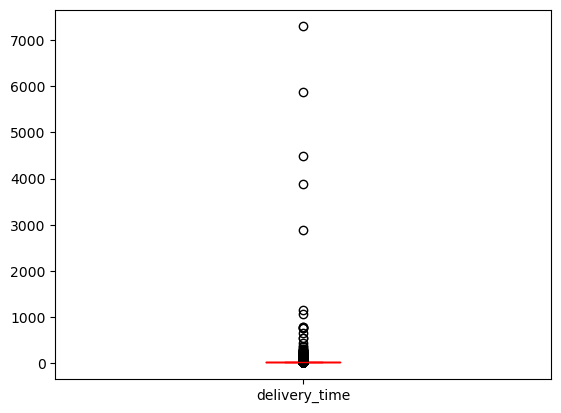

In [27]:
df['delivery_time'].plot(kind = 'box',color='red')

### Teating outliers

In [28]:
df1 =df[df['delivery_time'] < 40]

In [29]:
df1['delivery_time'].describe()

count    14669.000000
mean        16.992520
std          3.361265
min         15.000010
25%         15.266572
50%         15.763923
75%         17.099512
max         39.918947
Name: delivery_time, dtype: float64

<AxesSubplot:>

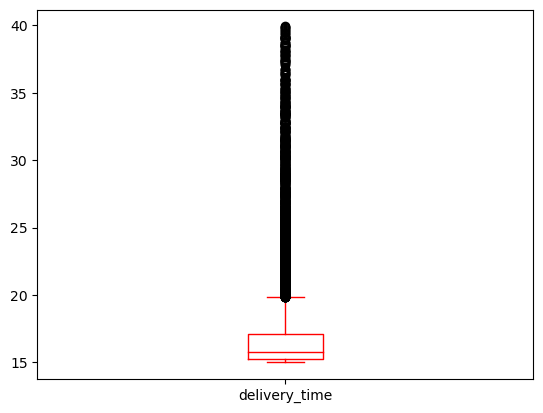

In [30]:
df1['delivery_time'].plot(kind = 'box',color='red')

### Data Visualization

In [43]:
# Calculate the 95th percentile of delivery time
percentile_95 = df1['delivery_time'].quantile(0.95)
print('95th percentile of delivery time:', percentile_95)

95th percentile of delivery time: 23.596276583333314


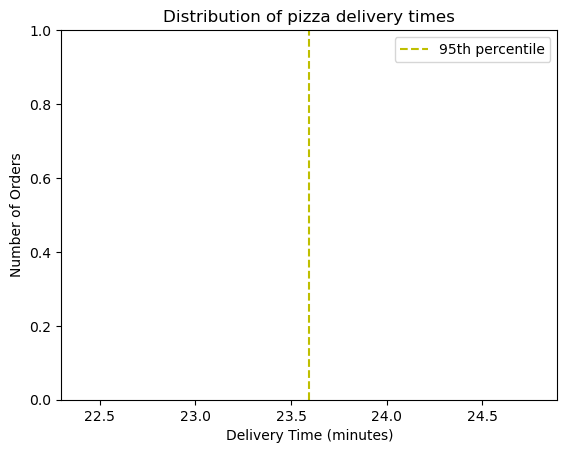

In [44]:
# Add a vertical line at the 95th percentile value
plt.axvline(percentile_95, color='y', linestyle='--', label='95th percentile')

# Set the plot title and axis labels
plt.title('Distribution of pizza delivery times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

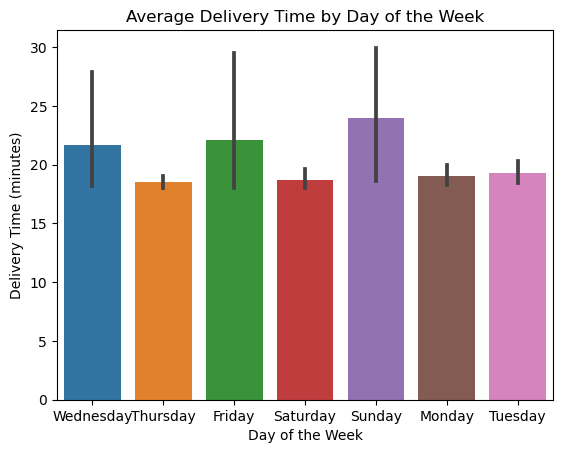

In [45]:
# Create a bar plot of delivery time by day of the week
df['day_of_week'] = df['order_placed_at'].dt.day_name()
sns.barplot(data=df, x='day_of_week', y='delivery_time')

# Set the plot title and axis labels
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')

# Show the plot
plt.show()

In [46]:
avg_delivery_time = df.groupby('order_date')['delivery_time'].mean()

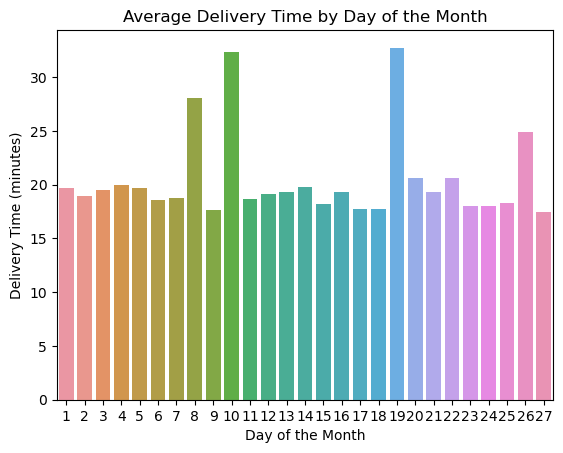

In [47]:
# Plot a bar chart of the average delivery time by day of the month
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values)

# Set the plot title and axis labels
plt.title('Average Delivery Time by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Delivery Time (minutes)')

# Show the plot
plt.show()

<AxesSubplot:title={'center':'No.of orders per day'}, xlabel='Days', ylabel='Orders'>

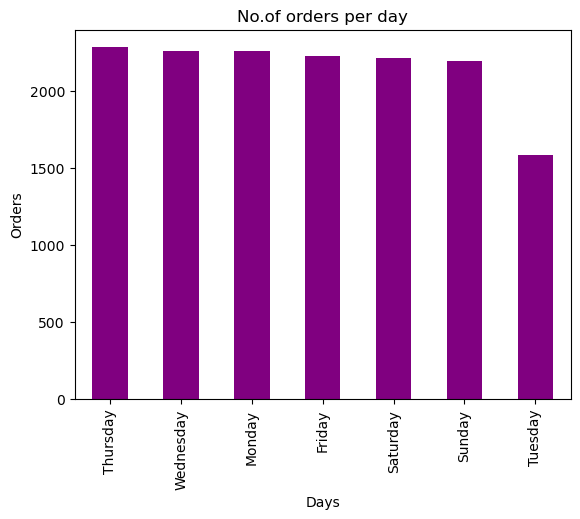

In [48]:
df['order_day'].value_counts().plot(kind='bar',color='purple', title='No.of orders per day',xlabel='Days',ylabel='Orders')

<AxesSubplot:title={'center':'Number of orders per date in the month of march'}, xlabel='Date', ylabel='Orders'>

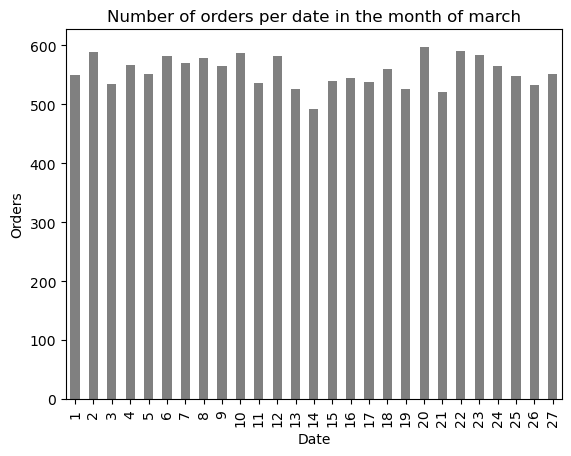

In [49]:
df['order_date'].value_counts().sort_index().plot(kind='bar',color='grey', title='Number of orders per date in the month of march',xlabel='Date',ylabel='Orders')

In [50]:
# Calculate the 95th percentile of delivery time
percentile_95 = df1['delivery_time'].quantile(0.95)
print('95th percentile of delivery time:', percentile_95)

95th percentile of delivery time: 23.596276583333314


In [51]:
on_time_delivery = df1[df1['delivery_time'] < 31].shape[0]
print('Number of on-time deliveries:', on_time_delivery)


Number of on-time deliveries: 14443


In [52]:
late_delivery = df1[df1['delivery_time'] > 31 ].shape[0]
print('Number of late deliveries :', late_delivery)

Number of late deliveries : 226


In [53]:
total_delivery = df['delivery_time'].count()
print('Total number of deliveries:', total_delivery)

Total number of deliveries: 15000


In [58]:
delivery_performance = (total_delivery - late_delivery) / total_delivery * 100
print('Delivery performance:', delivery_performance, '%')

Delivery performance: 98.49333333333334 %


In [59]:
if percentile_95 <= 31:
    print("The pizza delivery store has a 95th percentile of order delivery time less than 31 minutes.")
else:
    print("The pizza delivery store does not have a 95th percentile of order delivery time less than 31 minutes.")

The pizza delivery store has a 95th percentile of order delivery time less than 31 minutes.


### Conclusion

Total number of deliveries: 15000

On time deliveries: 14443

Late deliveries: 226

95 percentile on order delivery time: 23.596 

Therefore kanav do not have to worry about the performance of his store.